In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Data/input/creditcard.csv')

import matplotx
plt.style.use(matplotx.styles.github["dark"])

Features: V1, V2, ..., V28, Time, Amount


Target: Class (0 = legítima, 1 = fraude)

In [3]:
X = df.drop(columns=["Class"])
y = df["Class"]

- Normalizando (StandardScaler)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[["Time", "Amount"]] = scaler.fit_transform(X[["Time", "Amount"]])
X.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [14]:
X[["Time", "Amount"]].describe()

,Time,Amount
count,2.848070e+05,2.848070e+05
mean,3.193372e-17,-8.781773e-18
std,1.000002e+00,1.000002e+00
min,-1.996583e+00,-3.532294e-01
25%,-8.552120e-01,-3.308401e-01
50%,-2.131453e-01,-2.652715e-01
75%,9.372174e-01,-4.471707e-02
max,1.642058e+00,1.023622e+02


- Divisão treino/teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## stratify=y -> pra que a proporção de fraudes no conjunto de teste é a mesma que no total

1) Class-weight balance
- Penalizes errors on minority classes

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

- Avaliando o modelo:

- Curva ROC (avalia o desempenho do modelo)
- Auc é a área sob a Curva ROC: mede a separação entre classes (quanto mais próximo de 1, melhor

              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962

AUC: 0.9721669425367221


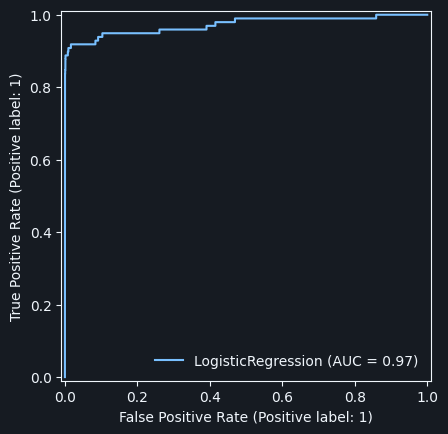

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred, digits=4))
print("AUC:", roc_auc_score(y_test, y_prob))




########### Curva ROC (avalia o desempenho do modelo)

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


- Matriz de confusão

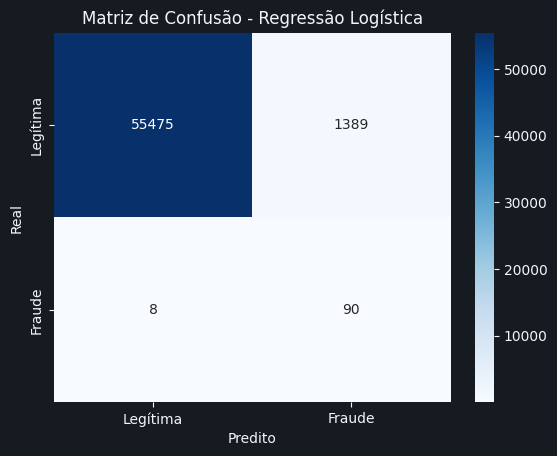

In [10]:
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legítima','Fraude'],
            yticklabels=['Legítima','Fraude'])
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

- Quantas fraudes reais o modelo detectou? (verdadeiros positivos) -> 90
- Quantas transações legítimas foram classificadas erroneamente como fraude (falsos positivos)? -> 1389

Usando Class-weight balance → ajusta o custo da regressão pra pesar mais os erros em fraudes.

Oversampling (SMOTE) → gera exemplos da classe minoritária. 

Undersampling → diminui o número de exs da classe majoritária.